In [16]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import re
matplotlib.rc('text',usetex=True)
matplotlib.rcParams['font.family'] = 'sans'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 10
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['lines.markeredgewidth'] = 2
matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.minor.size'] = 2
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.minor.size'] = 2

In [17]:
water_sapt2=('./Result-water2-sapt2-aug-cc-pvtz.dat')
water_sapt2p3=('./Result-water2-sapt2+3-aug-cc-pvtz.dat')
water_saptdft_pbe0=('./result-water2-saptdft-aug-cc-pvtz-pbe0.dat')

zn_sapt2=('./Result-zn-hoh-sapt2-aug-cc-pvtz.dat')
zn_sapt2p3=('./Result-zn-hoh-sapt2+3-aug-cc-pvtz.dat')
zn_saptdft_pbe0=('./result-zn-hoh-saptdft-aug-cc-pvtz-pbe0.dat')

f_sapt2=('./Result-f-hoh-sapt2-aug-cc-pvtz.dat')
f_sapt2p3=('./Result-f-hoh-sapt2+3-aug-cc-pvtz.dat')
f_saptdft_pbe0=('./f-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat')

In [18]:
data_water_sapt2 = pd.read_csv(water_sapt2,sep='\s+',header=0,comment='#')
data_water_sapt2p3 = pd.read_csv(water_sapt2p3,sep='\s+',header=0,comment='#')
data_water_saptdft_pbe0 = pd.read_csv(water_saptdft_pbe0,sep='\s+',header=0,comment='#')

data_zn_sapt2 = pd.read_csv(zn_sapt2,sep='\s+',header=0,comment='#')
data_zn_sapt2p3 = pd.read_csv(zn_sapt2p3,sep='\s+',header=0,comment='#')
data_zn_saptdft_pbe0 = pd.read_csv(zn_saptdft_pbe0,sep='\s+',header=0,comment='#')

data_f_sapt2 = pd.read_csv(f_sapt2,sep='\s+',header=0,comment='#')
data_f_sapt2p3 = pd.read_csv(f_sapt2p3,sep='\s+',header=0,comment='#')
data_f_saptdft_pbe0 = pd.read_csv(f_saptdft_pbe0,sep='\s+',header=0,comment='#')

In [19]:
data_zn_sapt2

d        Elec         Rep        Ind       Disp        Tot       Ct  \
0   1.5 -193.281790  245.138298 -86.134161 -14.866447 -49.144099 -14.1998   
1   1.6 -149.589346  161.031612 -75.583923 -11.840471 -75.982128  -3.9558   
2   1.7 -118.839769  105.895470 -67.493045  -9.304616 -89.741960  -0.3151   
3   1.8  -96.862001   69.709933 -60.787515  -7.249945 -95.189528   0.4159   
4   1.9  -80.865222   45.936701 -54.893840  -5.619525 -95.441885   0.0709   
5   2.0  -68.981460   30.303528 -49.524063  -4.343223 -92.545218  -0.5246   
6   2.1  -59.954806   20.013049 -44.545673  -3.353079 -87.840509  -1.0404   
7   2.2  -52.937222   13.231677 -39.906589  -2.589440 -82.201575  -1.3744   
8   2.3  -47.353481    8.757298 -35.593255  -2.002668 -76.192106  -1.5253   
9   2.4  -42.810837    5.801503 -31.607450  -1.552738 -70.169522  -1.5312   
10  2.5  -39.038604    3.846719 -27.953710  -1.208002 -64.353596  -1.4397   
11  2.6  -35.847980    2.552670 -24.632951  -0.943753 -58.872014  -1.2936   
12  2.7  -33.105514    1.695267 -21.639923  -0.740883 -53.791053  -1.1251   
13  2.8  -30.715560    1.126716 -18.963038  -0.584724 -49.136607  -0.9555   
14  2.9  -28.608564    0.749420 -16.585448  -0.464096 -44.908687  -0.7972   
15  3.0  -26.733082    0.498860 -14.486606  -0.370516 -41.091345  -0.6562   

          dHF  
0   73.193128  
1   41.927858  
2   24.888403  
3   14.708922  
4    8.108718  
5    3.608204  
6    0.496163  
7   -1.616148  
8   -2.979104  
9   -3.777109  
10  -4.155916  
11  -4.232984  
12  -4.102182  
13  -3.836975  
14  -3.493363  
15  -3.112785

In [20]:
data_f_sapt2

d       Elec         Rep         Ind       Disp         Tot       Ct  \
0   0.7 -60.849058  423.467701 -214.708805 -40.759837  107.150001 -58.2824   
1   0.8 -91.438237  323.703816 -164.596062 -30.808220   36.861297 -45.5570   
2   0.9 -94.423595  243.761847 -124.563901 -23.460858    1.313492 -34.7213   
3   1.0 -86.678275  181.599041  -93.824486 -18.045638  -16.949358 -25.6319   
4   1.1 -75.732020  134.291681  -70.768891 -14.020428  -26.229657 -18.5161   
5   1.2 -64.773876   98.820816  -53.677165 -10.993817  -30.624042 -13.3200   
6   1.3 -55.004688   72.493573  -41.056299  -8.691071  -32.258485  -9.7038   
7   1.4 -46.734001   53.084855  -31.722831  -6.919147  -32.291123  -7.2326   
8   1.5 -39.898025   38.848185  -24.781730  -5.541795  -31.373364  -5.5224   
9   1.6 -34.304928   28.433839  -19.578017  -4.462174  -29.911279  -4.2958   
10  2.1 -18.311732    6.090438   -7.069220  -1.611799  -20.902312  -1.3044   
11  2.6 -11.627167    1.385121   -3.155186  -0.626710  -14.023941  -0.3943   
12  3.1  -8.171533    0.336917   -1.625552  -0.256735   -9.716904  -0.1253   
13  3.6  -6.095307    0.086541   -0.927147  -0.111719   -7.047632  -0.0408   
14  4.1  -4.734700    0.023043   -0.572175  -0.052624   -5.336456  -0.0138   
15  4.6  -3.788739    0.006276   -0.374973  -0.026776   -4.184212  -0.0050   
16  5.1  -3.101601    0.001749   -0.257222  -0.014576   -3.371650  -0.0019   

          dHF  
0   44.166126  
1   -5.291586  
2  -23.317225  
3  -26.693300  
4  -24.105774  
5  -19.694342  
6  -15.256757  
7  -11.455352  
8   -8.436069  
9   -6.135858  
10  -1.148561  
11  -0.194147  
12  -0.022490  
13   0.004648  
14   0.006178  
15   0.004343  
16   0.002764

In [21]:
data_zn_saptdft_pbe0

kcal/mol       elst       exch       IND       dHF      DISP      Eint  \
0    Zn-H2O_1 -190.14066  241.69198 -82.30614  22.90396 -14.26529 -45.02018   
1    Zn-H2O_2 -147.21223  157.71320 -73.10873  19.08742 -11.67085 -74.27856   
2    Zn-H2O_3 -117.06507  103.12625 -65.60911  14.54263  -9.38497 -88.93284   
3    Zn-H2O_4  -95.55833   67.59047 -59.18807  10.02507  -7.46498 -94.62103   
4    Zn-H2O_5  -79.89921   44.38636 -53.44992   5.98516  -5.89346 -94.85624   
5    Zn-H2O_6  -68.26991   29.20879 -48.21550   2.64184  -4.63033 -91.90697   
6    Zn-H2O_7  -59.42001   19.25126 -43.37212   0.05355  -3.62711 -87.16799   
7    Zn-H2O_8  -52.52548   12.70899 -38.87230  -1.82109  -2.83675 -81.52555   
8    Zn-H2O_9  -47.03622    8.40266 -34.70681  -3.07573  -2.21828 -75.55865   
9   Zn-H2O_10  -42.56012    5.56156 -30.86313  -3.82393  -1.73598 -69.59767   
10  Zn-H2O_11  -38.83989    3.68480 -27.34136  -4.17964  -1.36096 -63.85740   
11  Zn-H2O_12  -35.68302    2.44318 -24.14521  -4.24401  -1.06976 -58.45481   
12  Zn-H2O_13  -32.96555    1.62142 -21.25892  -4.10808  -0.84370 -53.44676   
13  Zn-H2O_14  -30.59390    1.07693 -18.70984  -3.84030  -0.66849 -48.89529   
14  Zn-H2O_15  -28.50059    0.71591 -16.36677  -3.49537  -0.53109 -44.68253   
15  Zn-H2O_16  -26.63526    0.47607 -14.32264  -3.11406  -0.42406 -40.90590   

          CT       POL  
0  -44.18460 -61.02556  
1  -35.30046 -56.89564  
2  -27.58975 -52.56192  
3  -21.19740 -48.01587  
4  -16.02216 -43.41294  
5  -11.95287 -38.90448  
6   -8.79794 -34.62773  
7   -6.40119 -30.65003  
8   -4.60834 -27.02274  
9   -3.28374 -23.75545  
10  -2.32297 -20.83874  
11  -1.63451 -18.26669  
12  -1.14349 -16.00735  
13  -0.79811 -14.07143  
14  -0.55124 -12.32016  
15  -0.38056 -10.82802

Also include the CCSD(T) references

In [22]:
water2_cc_file = 'water2-ccsdt-aug-cc-pvtz.dat'
zn_h2o_cc_file = 'zn-hoh-ccsdt-aug-cc-pvtz.dat'
f_h2o_cc_file  = 'f-hoh-ccsdt-aug-cc-pvtz.dat'

In [23]:
cc_ref = {}
cc_ref['water2'] = pd.read_csv(water2_cc_file,sep='\s+',header=0,comment='#')
cc_ref['zn_h2o'] = pd.read_csv(zn_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['f_h2o']  = pd.read_csv(f_h2o_cc_file,sep='\s+',header=0,comment='#')

In [24]:
cc_ref['zn_h2o']

d   Eint
0   1.5 -45.08
1   1.6 -74.38
2   1.7 -89.49
3   1.8 -95.77
4   1.9 -96.62
5   2.0 -94.22
6   2.1 -89.95
7   2.2 -84.67
8   2.3 -78.96
9   2.4 -73.16
10  2.5 -67.48
11  2.6 -62.05
12  2.7 -56.95
13  2.8 -52.21
14  2.9 -47.84
15  3.0 -43.83

In [25]:
water2_dhf3_file = 'water2-sapt2+3-deltahf3.dat'
zn_h2o_dhf3_file = 'zn-hoh-sapt2+3-delthf3.dat'
f_h2o_dhf3_file  = 'result-f-hoh-deltahf3.dat'

In [26]:
zn_h2o_dhf3_file

'zn-hoh-sapt2+3-delthf3.dat'

In [27]:
dhf3 = {}
dhf3['water2'] = pd.read_csv(water2_dhf3_file,sep='\s+',header=0)
dhf3['zn_h2o'] = pd.read_csv(zn_h2o_dhf3_file,sep='\s+',header=0,comment='#')
dhf3['f_h2o']  = pd.read_csv(f_h2o_dhf3_file,sep='\s+',header=0,comment='#')

In [28]:
dhf3['f_h2o']

dHF3
0.7  387.739330
0.8  178.002100
0.9   74.721548
1.0   26.533203
1.1    5.482008
1.2   -2.763852
1.3   -5.255836
1.4   -5.357654
1.5   -4.611929
1.6   -4.611929
2.1   -0.865607
2.6   -0.192964
3.1   -0.046835
3.6   -0.012235
4.1   -0.004391
4.6   -0.001112
5.1   -0.000422

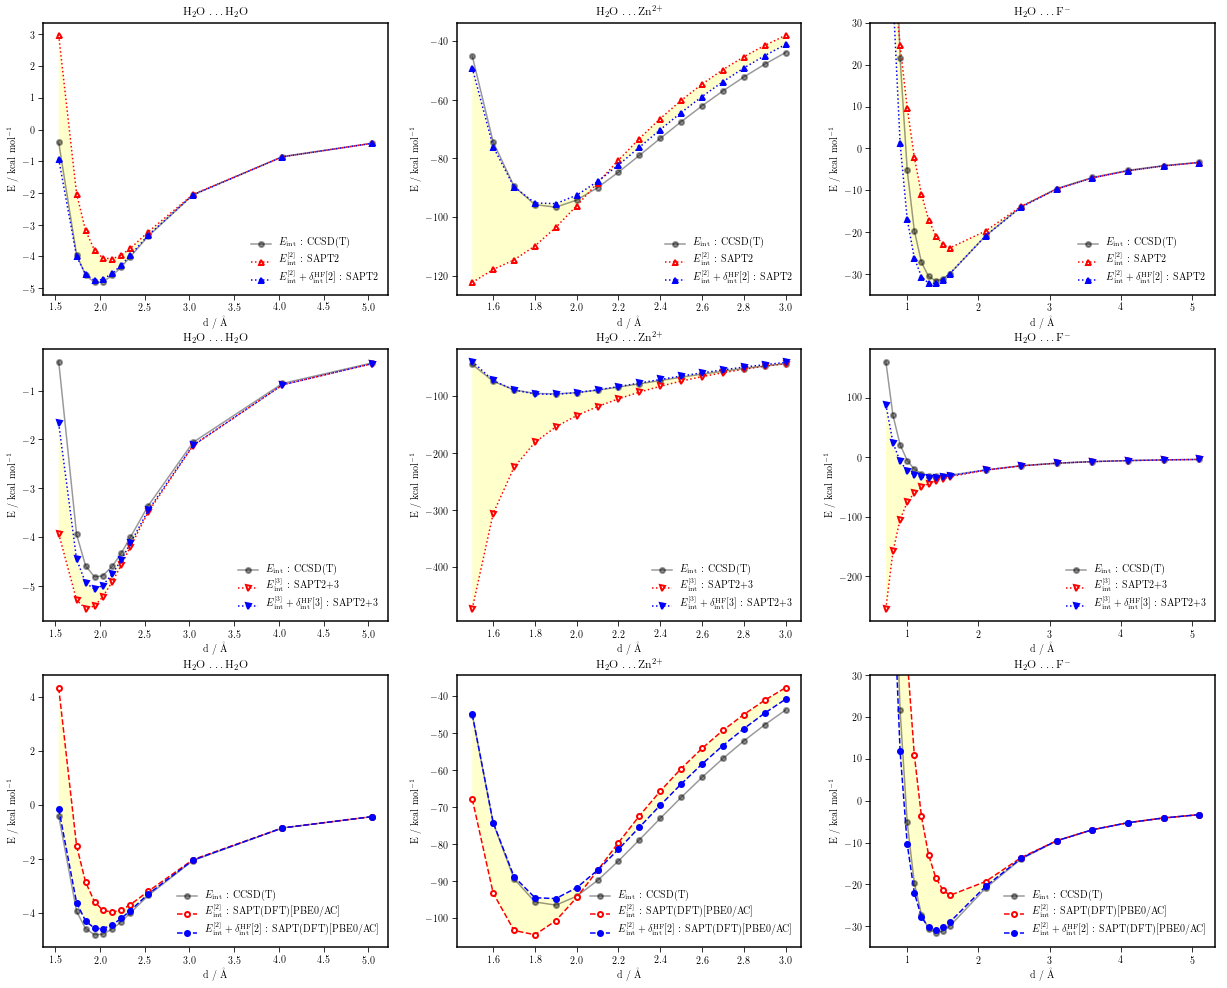

In [34]:
cc_alpha = 0.4 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive

Xlabel = 'd / \u00c5'
Ylabel = 'E / kcal mol$^{-1}$'
xmin = 1.4
xmax = 5.1
ymin = -5.3
ymax = 2.1

xmin_zn = 1.4
xmax_zn = 3.1
ymin_zn = -130
ymax_zn = -50
#fig = plt.figure(figsize=(15, 15))
fig = plt.figure(figsize=(21,17)) # taille horizontale x verticale

#fig.subplots_adjust(hspace=0.5, wspace=0.5)
grph1 = fig.add_subplot(331)
grph2 = fig.add_subplot(334)
grph3 = fig.add_subplot(337)

grph4 = fig.add_subplot(332)
grph5 = fig.add_subplot(335)
grph6 = fig.add_subplot(338)

grph7 = fig.add_subplot(333)
grph8 = fig.add_subplot(336)
grph9 = fig.add_subplot(339)

grph1.plot(cc_ref['water2']['d'], cc_ref['water2']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph1.plot(data_water_sapt2['d'], data_water_sapt2['Tot']-data_water_sapt2['dHF'], 
           'r', linestyle=':', marker='^', markeredgecolor='r', markerfacecolor='white', 
           label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT2')
grph1.plot(data_water_sapt2['d'], data_water_sapt2['Tot'], 
           'b', linestyle=':', marker='^', markeredgecolor='b', 
           label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')

#grph1.set_xlim(xmin, xmax)
#grph1.set_ylim(ymin,ymax)
grph1.set_xlabel(Xlabel)
grph1.set_ylabel(Ylabel)
grph1.fill_between(data_water_sapt2['d'],data_water_sapt2['Tot']-data_water_sapt2['dHF'],data_water_sapt2['Tot'],alpha=0.2,facecolor='yellow')
grph1.legend(loc='lower right',frameon=False)
grph1.set_title('H$_{2}$O \dots H$_{2}$O')

grph2.plot(cc_ref['water2']['d'], cc_ref['water2']['Eint'],
          'k', linestyle='-', marker='o',  alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph2.plot(data_water_sapt2['d'], data_water_sapt2p3['Tot']+data_water_sapt2p3['dHF']-dhf3['water2']['dHF3'], 
           'r', linestyle=':', marker='v', markeredgecolor='r',  markerfacecolor='white',
           label=r'$E{\mathrm{_{int}^{[3]}}}$ : SAPT2+3')
grph2.plot(data_water_sapt2['d'], data_water_sapt2p3['Tot'], 
           'b', linestyle=':', marker='v', markeredgecolor='b', 
           label=r'$E\mathrm{_{int}^{[3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
#grph2.set_xlim(xmin, xmax)
#grph2.set_ylim(ymin,ymax)
grph2.set_xlabel(Xlabel)
grph2.set_ylabel(Ylabel)
grph2.fill_between(data_water_sapt2['d'],data_water_sapt2p3['Tot']+data_water_sapt2p3['dHF']-dhf3['water2']['dHF3'],data_water_sapt2p3['Tot'],
                   alpha=0.2,facecolor='yellow')
grph2.legend(loc='lower right',frameon=False)
grph2.set_title('H$_{2}$O \dots H$_{2}$O')

grph3.plot(cc_ref['water2']['d'], cc_ref['water2']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph3.plot(data_water_sapt2['d'], data_water_saptdft_pbe0['Eint']-data_water_saptdft_pbe0['dHF'], 
           'r', linestyle='--', marker='o', markeredgecolor='r',  markerfacecolor='white',
           label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/AC]')
grph3.plot(data_water_sapt2['d'], data_water_saptdft_pbe0['Eint'], 
           'b', linestyle='--', marker='o', markeredgecolor='b', 
           label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')
#grph3.set_xlim(xmin, xmax)
#grph3.set_ylim(ymin,ymax)
grph3.set_xlabel(Xlabel)
grph3.set_ylabel(Ylabel)
grph3.fill_between(data_water_sapt2['d'],data_water_saptdft_pbe0['Eint']-data_water_saptdft_pbe0['dHF'],data_water_saptdft_pbe0['Eint'],alpha=0.2,facecolor='yellow')
grph3.legend(loc='lower right',frameon=False)
grph3.set_title('H$_{2}$O \dots H$_{2}$O')

##########
# Zn..H2O
##########
grph4.plot(cc_ref['zn_h2o']['d'], cc_ref['zn_h2o']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph4.plot(data_zn_sapt2['d'], data_zn_sapt2['Tot']-data_zn_sapt2['dHF'], 
           'r', linestyle=':', marker='^', markeredgecolor='r',  markerfacecolor='white',
           label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT2')
grph4.plot(data_zn_sapt2['d'], data_zn_sapt2['Tot'], 
           'b', linestyle=':', marker='^', markeredgecolor='b', 
           label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')
#grph4.set_xlim(xmin_zn, xmax_zn)
#grph4.set_ylim(ymin_zn,ymax_zn)
grph4.set_xlabel(Xlabel)
grph4.set_ylabel(Ylabel)
grph4.fill_between(data_zn_sapt2['d'],data_zn_sapt2['Tot']-data_zn_sapt2['dHF'],data_zn_sapt2['Tot'],
                   alpha=0.2,facecolor='yellow')
grph4.legend(loc='lower right',frameon=False)
grph4.set_title('H$_{2}$O \dots Zn$^{2+}$')

grph5.plot(cc_ref['zn_h2o']['d'], cc_ref['zn_h2o']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph5.plot(data_zn_sapt2['d'], data_zn_sapt2p3['Tot']+data_zn_sapt2p3['dHF']-dhf3['zn_h2o']['dHF3'], 
           'r', linestyle=':', marker='v', markeredgecolor='r',  markerfacecolor='white',
           label=r'$E\mathrm{_{int}^{[3]}}$ : SAPT2+3')
grph5.plot(data_zn_sapt2['d'], data_zn_sapt2p3['Tot'], 
           'b', linestyle=':', marker='v', markeredgecolor='b', 
           label=r'$E\mathrm{_{int}^{[3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
#grph5.set_xlim(xmin_zn, xmax_zn)
#grph5.set_ylim(ymin_zn,ymax_zn)
grph5.set_xlabel(Xlabel)
grph5.set_ylabel(Ylabel)
grph5.fill_between(data_zn_sapt2['d'],data_zn_sapt2p3['Tot']+data_zn_sapt2p3['dHF']-dhf3['zn_h2o']['dHF3'],
                   data_zn_sapt2p3['Tot'],
                   alpha=0.2,facecolor='yellow')
grph5.legend(loc='lower right',frameon=False)
grph5.set_title('H$_{2}$O \dots Zn$^{2+}$')

grph6.plot(cc_ref['zn_h2o']['d'], cc_ref['zn_h2o']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph6.plot(data_zn_sapt2['d'], data_zn_saptdft_pbe0['Eint']-data_zn_saptdft_pbe0['dHF'], 
           'r', linestyle='--', marker='o', markeredgecolor='r',  markerfacecolor='white',
           label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/AC]')
grph6.plot(data_zn_sapt2['d'], data_zn_saptdft_pbe0['Eint'], 
           'b', linestyle='--', marker='o', markeredgecolor='b', 
           label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')
#grph6.set_xlim(xmin, xmax)
#grph6.set_ylim(ymin,ymax)
grph6.set_xlabel(Xlabel)
grph6.set_ylabel(Ylabel)
grph6.fill_between(data_zn_sapt2['d'],data_zn_saptdft_pbe0['Eint']-data_zn_saptdft_pbe0['dHF'],data_zn_saptdft_pbe0['Eint'],
                   alpha=0.2,facecolor='yellow')
grph6.legend(loc='lower right',frameon=False)
grph6.set_title('H$_{2}$O \dots Zn$^{2+}$')


# F-..H2O
##########
grph7.plot(cc_ref['f_h2o']['d'], cc_ref['f_h2o']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph7.plot(data_f_sapt2['d'], data_f_sapt2['Tot']-data_f_sapt2['dHF'], 
           'r', linestyle=':', marker='^', markeredgecolor='r',  markerfacecolor='white',
           label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT2')
grph7.plot(data_f_sapt2['d'], data_f_sapt2['Tot'], 
           'b', linestyle=':', marker='^', markeredgecolor='b', 
           label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT2')
#grph7.set_xlim(xmin, xmax)
grph7.set_ylim(-35,+30)
grph7.set_xlabel(Xlabel)
grph7.set_ylabel(Ylabel)
grph7.fill_between(data_f_sapt2['d'],data_f_sapt2['Tot']-data_f_sapt2['dHF'],data_f_sapt2['Tot'],
                   alpha=0.2,facecolor='yellow')
grph7.legend(loc='lower right',frameon=False)
grph7.set_title('H$_{2}$O \dots F$^{-}$')

grph8.plot(cc_ref['f_h2o']['d'], cc_ref['f_h2o']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph8.plot(data_f_sapt2['d'], data_f_sapt2p3['Tot']+data_f_sapt2p3['dHF']-dhf3['f_h2o']['dHF3'], 
           'r', linestyle=':', marker='v', markeredgecolor='r',  markerfacecolor='white',
           label=r'$E\mathrm{_{int}^{[3]}}$ : SAPT2+3')
grph8.plot(data_f_sapt2['d'], data_f_sapt2p3['Tot'], 
           'b', linestyle=':', marker='v', markeredgecolor='b', 
           label=r'$E\mathrm{_{int}^{[3]}+\delta^{HF}_{int}[3]}$ : SAPT2+3')
#grph8.set_xlim(xmin, xmax)
#grph8.set_ylim(-35,+30)
grph8.set_xlabel(Xlabel)
grph8.set_ylabel(Ylabel)
grph8.fill_between(data_f_sapt2['d'],data_f_sapt2p3['Tot']+data_f_sapt2p3['dHF']-dhf3['f_h2o']['dHF3'],
                   data_f_sapt2p3['Tot'],
                   alpha=0.2,facecolor='yellow')
grph8.legend(loc='lower right',frameon=False)
grph8.set_title('H$_{2}$O \dots F$^{-}$')

grph9.plot(cc_ref['f_h2o']['d'], cc_ref['f_h2o']['Eint'],
          'k', linestyle='-', marker='o', alpha=cc_alpha,
          label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph9.plot(data_f_sapt2['d'], data_f_saptdft_pbe0['Eint']-data_f_saptdft_pbe0['dHF'], 
           'r', linestyle='--', marker='o', markeredgecolor='r', markerfacecolor='white', 
           label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/AC]')
grph9.plot(data_f_sapt2['d'], data_f_saptdft_pbe0['Eint'], 
           'b', linestyle='--', marker='o', markeredgecolor='b', 
           label=r'$E\mathrm{_{int}^{[2]}+\delta^{HF}_{int}[2]}$ : SAPT(DFT)[PBE0/AC]')
#grph9.set_xlim(xmin, xmax)
grph9.set_ylim(-35,+30)
grph9.set_xlabel(Xlabel)
grph9.set_ylabel(Ylabel)
grph9.fill_between(data_f_sapt2['d'],data_f_saptdft_pbe0['Eint']-data_f_saptdft_pbe0['dHF'],data_f_saptdft_pbe0['Eint'],alpha=0.2,facecolor='yellow')
grph9.legend(loc='lower right',frameon=False)
grph9.set_title('H$_{2}$O \dots F$^{-}$')

plt.show()

In [36]:
fig.savefig('SAPT_SAPTdft_and_dhf.pdf')